In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load the dataset
dataset = pd.read_csv("/content/1729258-1613615-Stock_Price_data_set_(1).csv")  # Replace 'your_stock_data.csv' with your dataset file
# Assuming the dataset has a column named 'Close' for stock prices
data = dataset['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM model
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 60  # Define the time steps for the LSTM model
X, y = prepare_data(scaled_data, time_steps)

# Reshape the data for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Make predictions
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)
real_stock_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/20
24/24 [==============================] - 10s 151ms/step - loss: 0.0307
Epoch 2/20
24/24 [==============================] - 2s 96ms/step - loss: 0.0056
Epoch 3/20
24/24 [==============================] - 2s 85ms/step - loss: 0.0049
Epoch 4/20
24/24 [==============================] - 2s 81ms/step - loss: 0.0050
Epoch 5/20
24/24 [==============================] - 2s 79ms/step - loss: 0.0042
Epoch 6/20
24/24 [==============================] - 2s 74ms/step - loss: 0.0040
Epoch 7/20
24/24 [==============================] - 3s 119ms/step - loss: 0.0038
Epoch 8/20
24/24 [==============================] - 2s 101ms/step - loss: 0.0041
Epoch 9/20
24/24 [==============================] - 2s 101ms/step - loss: 0.0043
Epoch 10/20
24/24 [==============================] - 2s 82ms/step - loss: 0.0036
Epoch 11/20
24/24 [==============================] - 2s 78ms/step - loss: 0.0040
Epoch 12/20
24/24 [==============================] - 2s 84ms/step - loss: 0.0035
Epoch 13/20
24/24 [=============

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(real_stock_prices, predicted_stock_prices)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R2 score)
r2 = r2_score(real_stock_prices, predicted_stock_prices)
print(f"R-squared (R2 score): {r2}")

Mean Squared Error (MSE): 1070.136519059548
Root Mean Squared Error (RMSE): 32.71294115574978
R-squared (R2 score): 0.7854493113304817


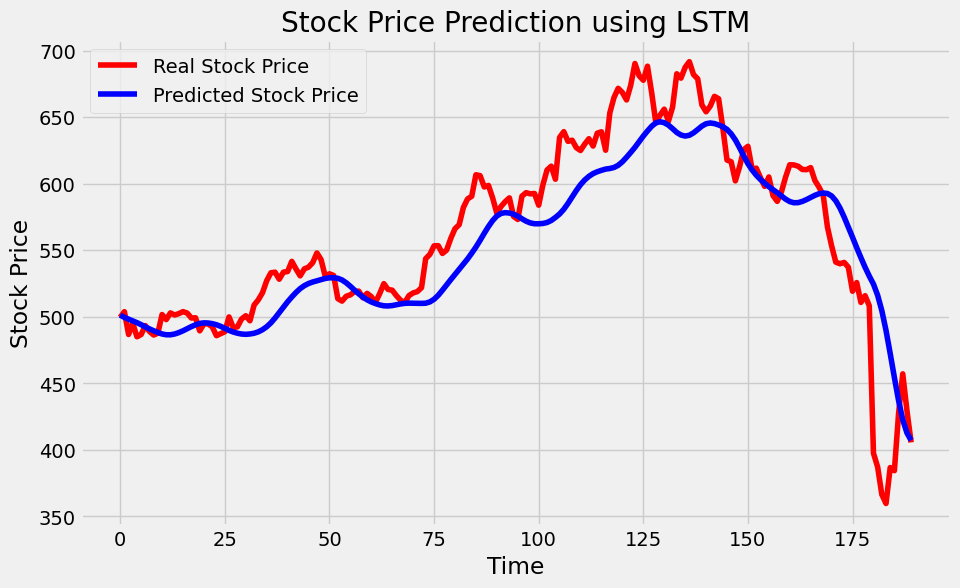

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(real_stock_prices, color='red', label='Real Stock Price')
plt.plot(predicted_stock_prices, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()